### Analytics Vidhya: 66.9

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv("C:/Users/saidh/Downloads/High Radius/H2HBABBA2945_G.SaiDheeraj_FoodDemand Prediction/train_GzS76OK/train.csv")
test = pd.read_csv("C:/Users/saidh/Downloads/High Radius/H2HBABBA2945_G.SaiDheeraj_FoodDemand Prediction/train_GzS76OK/test.csv")

In [18]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [19]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [21]:
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [22]:
train['num_orders'].describe()

count    456548.000000
mean        261.872760
std         395.922798
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       24299.000000
Name: num_orders, dtype: float64

In [24]:
meal_info = pd.read_csv("C:/Users/saidh/Downloads/High Radius/H2HBABBA2945_G.SaiDheeraj_FoodDemand Prediction/train_GzS76OK/meal_info.csv")
center_info = pd.read_csv("C:/Users/saidh/Downloads/High Radius/H2HBABBA2945_G.SaiDheeraj_FoodDemand Prediction/train_GzS76OK/fulfilment_center_info.csv")

In [25]:
trainfinal = pd.merge(train, meal_info, on="meal_id", how="outer")
trainfinal = pd.merge(trainfinal, center_info, on="center_id", how="outer")
trainfinal.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [26]:
trainfinal = trainfinal.drop(['center_id', 'meal_id'], axis=1)
trainfinal.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [27]:
cols = trainfinal.columns.tolist()
print(cols)

['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area']


In [28]:
cols = cols[:2] + cols[9:] + cols[7:9] + cols[2:7]
print(cols)

['id', 'week', 'city_code', 'region_code', 'center_type', 'op_area', 'category', 'cuisine', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders']


In [29]:
trainfinal = trainfinal[cols]

In [30]:
trainfinal.dtypes

id                         int64
week                       int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
lb1 = LabelEncoder()
trainfinal['center_type'] = lb1.fit_transform(trainfinal['center_type'])

lb2 = LabelEncoder()
trainfinal['category'] = lb1.fit_transform(trainfinal['category'])

lb3 = LabelEncoder()
trainfinal['cuisine'] = lb1.fit_transform(trainfinal['cuisine'])

In [33]:
trainfinal.head()

,id,week,city_code,region_code,center_type,op_area,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,647,56,2,2.0,0,3,136.83,152.29,0,0,177
1,1018704,2,647,56,2,2.0,0,3,135.83,152.29,0,0,323
2,1196273,3,647,56,2,2.0,0,3,132.92,133.92,0,0,96
3,1116527,4,647,56,2,2.0,0,3,135.86,134.86,0,0,163
4,1343872,5,647,56,2,2.0,0,3,146.50,147.50,0,0,215


# EXPLORATORY ANALYSIS 

In [17]:
trainfinal.shape

(456548, 13)

C:\Users\Amartya Sen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'num_orders Distribution')

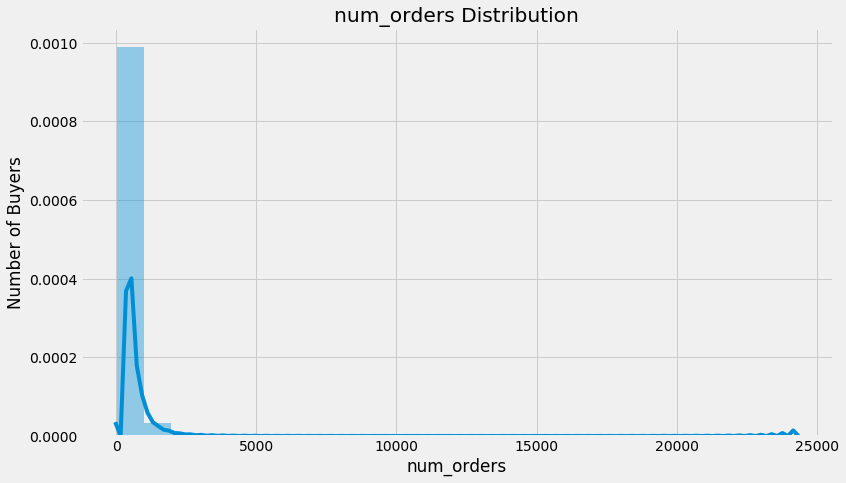

In [18]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(trainfinal.num_orders, bins = 25)
plt.xlabel("num_orders")
plt.ylabel("Number of Buyers")
plt.title("num_orders Distribution")

In [34]:
def reciprocal(x):
    y = 1/x
    return y

In [35]:
hehe = reciprocal(trainfinal.num_orders)

In [36]:
import math
def log(x):
    y = math.log(x, 10)
    return y

In [37]:
haha['numorders'] = log(trainfinal.num_orders)

TypeError: cannot convert the series to <class 'float'>

C:\Users\Amartya Sen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'num_orders Distribution')

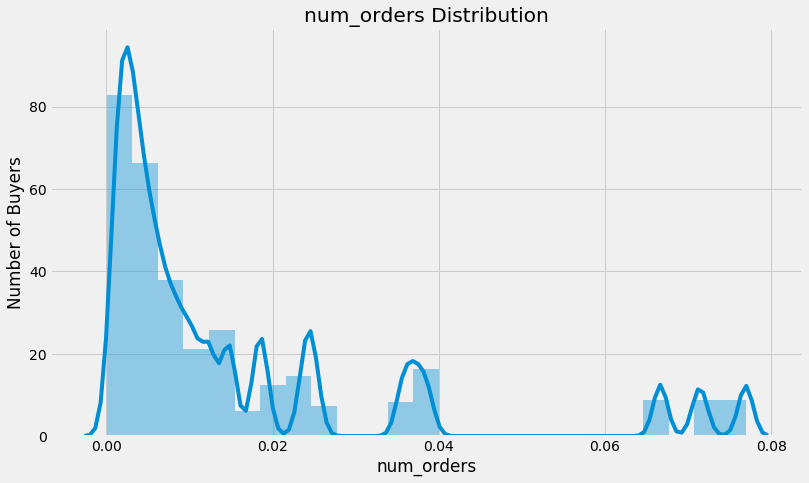

In [23]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(hehe, bins = 25)
plt.xlabel("num_orders")
plt.ylabel("Number of Buyers")
plt.title("num_orders Distribution")

# FEATURE ENGINEERING

In [38]:
trainfinal2 = trainfinal.drop(['id'], axis=1)
correlation = trainfinal2.corr(method='pearson')
columns = correlation.nlargest(8, 'num_orders').index
columns

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'cuisine', 'city_code', 'region_code', 'category'],
      dtype='object')

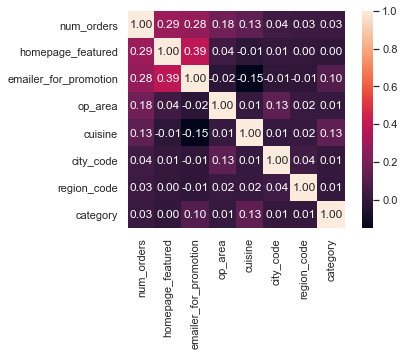

In [39]:
correlation_map = np.corrcoef(trainfinal2[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

# BASELINE ALGORITHM TEST

In [44]:
features = columns.drop(['num_orders'])
trainfinal3 = trainfinal[features]
X = trainfinal3.values
y = trainfinal['num_orders'].values

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

In [45]:
trainfinal3.head()

,homepage_featured,emailer_for_promotion,op_area,cuisine,city_code,region_code,category
0,0,0,2.0,3,647,56,0
1,0,0,2.0,3,647,56,0
2,0,0,2.0,3,647,56,0
3,0,0,2.0,3,647,56,0
4,0,0,2.0,3,647,56,0


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

**XGB**

from xgboost import XGBRegressor
XG = XGBRegressor()
XG.fit(X_train, y_train)
y_pred = XG.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

**LINEAR REGRESSION**

LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

**LASSO**

L = Lasso()
L.fit(X_train, y_train)
y_pred = L.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

**ELASTIC NET**

EN = ElasticNet()
EN.fit(X_train, y_train)
y_pred = EN.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

**DECISION TREE**

In [47]:
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 62.681032288572936


In [48]:
DT.get_params

<bound method BaseEstimator.get_params of DecisionTreeRegressor()>

**KNN**

In [49]:
KNN = KNeighborsRegressor()
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 66.71450128989018


**GRADIENT BOOST**

GB = GradientBoostingRegressor()
GB.fit(X_train, y_train)
y_pred = GB.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

**SVM**

In [32]:
from sklearn.svm import SVR

In [ ]:
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_lin.fit(X_train, y_train)
y_pred = svr_lin.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

# TUNING BEST MODEL (DT)

In [50]:
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict

sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

In [55]:
param_grid = {
              "min_samples_split": [2, 4, 8, 16],
              "min_samples_leaf": [1, 2, 3, 4],
              "max_leaf_nodes": [None, 10, 20, 100]
              }

grid_cv_dtm = GridSearchCV(DT, param_grid, cv=5)

grid_cv_dtm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': [None, 10, 20, 100],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 8, 16]})

In [57]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::0.651043855243022
Best Hyperparameters::
{'max_leaf_nodes': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [58]:
df = pd.DataFrame(data=grid_cv_dtm.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.914168,0.161130,0.045068,0.013511,None,1,2,"{'max_leaf_nodes': None, 'min_samples_leaf': 1...",0.664359,0.631142,0.654575,0.642067,0.652516,0.648932,0.011369,16
1,2.083413,0.138410,0.052285,0.013859,None,1,4,"{'max_leaf_nodes': None, 'min_samples_leaf': 1...",0.664415,0.631192,0.655087,0.642104,0.652917,0.649143,0.011442,14
2,1.945827,0.151823,0.054385,0.008448,None,1,8,"{'max_leaf_nodes': None, 'min_samples_leaf': 1...",0.664635,0.630940,0.654955,0.641538,0.653475,0.649109,0.011677,15
3,2.101396,0.285852,0.034174,0.005725,None,1,16,"{'max_leaf_nodes': None, 'min_samples_leaf': 1...",0.665874,0.631945,0.653995,0.643017,0.657053,0.650377,0.011762,10
4,1.921585,0.212621,0.051591,0.011704,None,2,2,"{'max_leaf_nodes': None, 'min_samples_leaf': 2...",0.664875,0.631490,0.654365,0.642381,0.654594,0.649541,0.011498,13


KeyError: "['param_max_depth'] not in index"

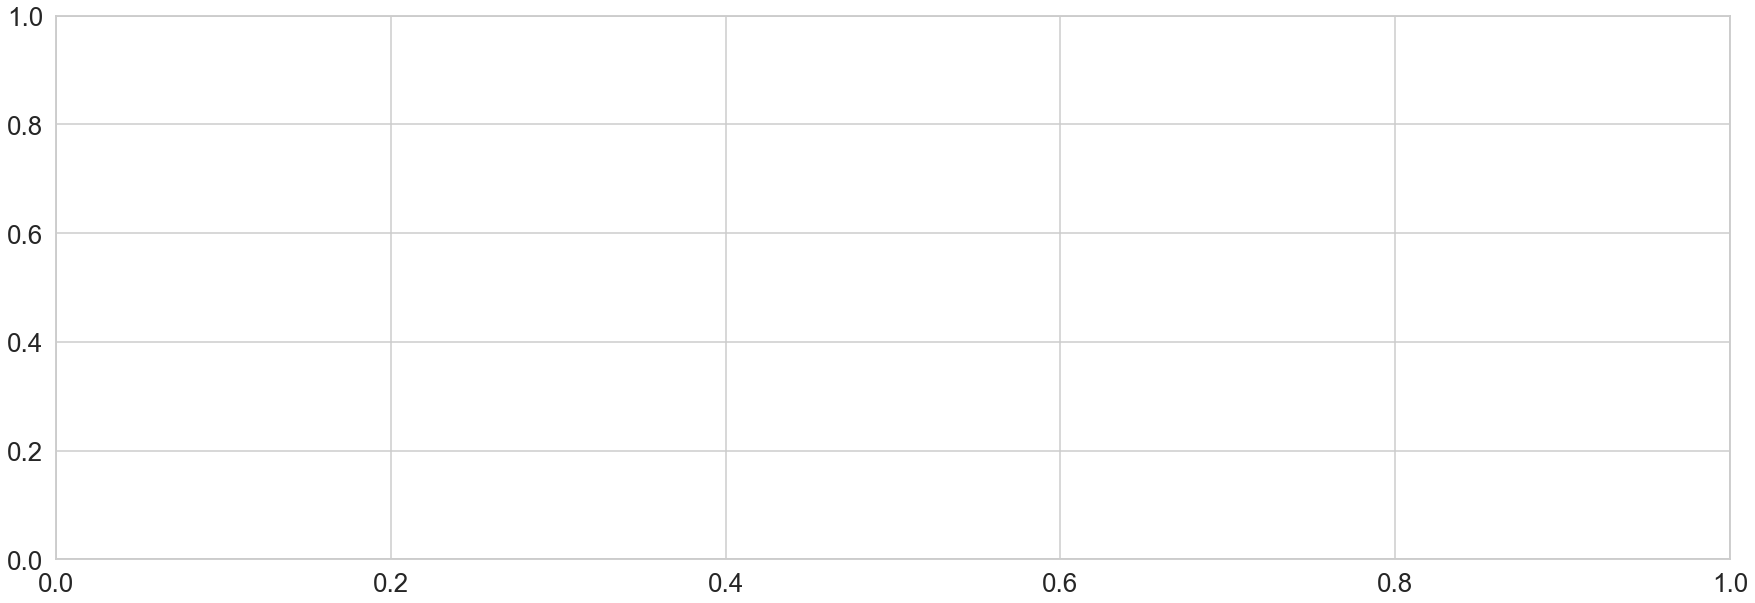

In [59]:
fig,ax = plt.subplots()
sns.pointplot(data=df[['mean_test_score',
                           'param_max_leaf_nodes',
                           'param_max_depth']],
             y='mean_test_score',x='param_max_depth',
             hue='param_max_leaf_nodes',ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")

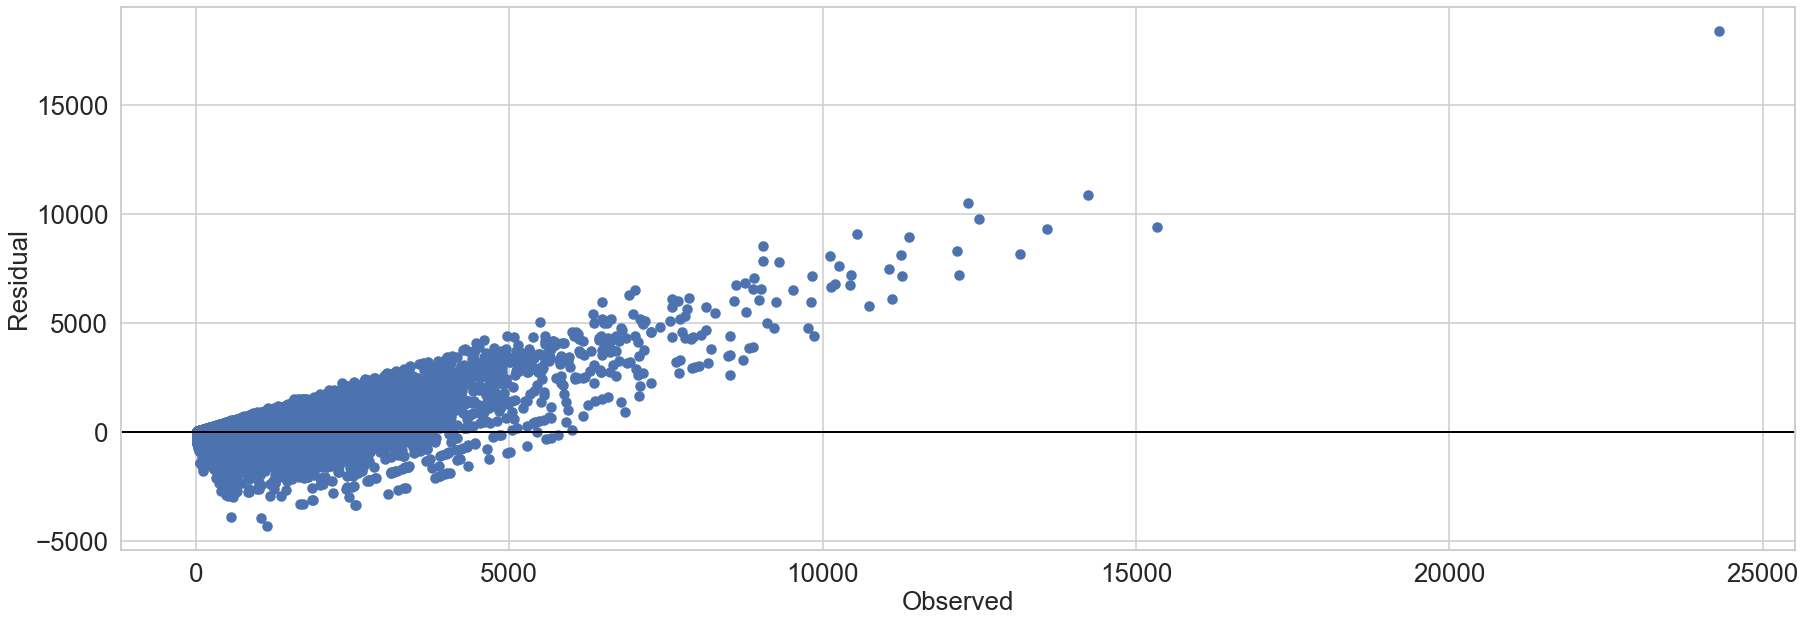

In [60]:
predicted = grid_cv_dtm.best_estimator_.predict(X)
residuals = y.flatten()-predicted

fig, ax = plt.subplots()
ax.scatter(y.flatten(), residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [61]:
r2_scores = cross_val_score(grid_cv_dtm.best_estimator_, X, y, cv=10)
mse_scores = cross_val_score(grid_cv_dtm.best_estimator_, X, y, cv=10,scoring='neg_mean_squared_error')

print("avg R-squared::{:.3f}".format(np.mean(r2_scores)))
print("MSE::{:.3f}".format(np.mean(mse_scores)))

avg R-squared::0.414
MSE::-87923.412


In [62]:
grid_cv_dtm.best_estimator_.fit(X_train, y_train)
y_pred = grid_cv_dtm.best_estimator_.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 62.71728574323671


# SUBMISSION

In [63]:
testfinal = pd.merge(test, meal_info, on="meal_id", how="outer")
testfinal = pd.merge(testfinal, center_info, on="center_id", how="outer")
testfinal = testfinal.drop(['meal_id', 'center_id'], axis=1)

tcols = testfinal.columns.tolist()
print(tcols)

['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area']


In [64]:
tcols = tcols[:2] + tcols[8:] + tcols[6:8] + tcols[2:6]
testfinal = testfinal[tcols]

lb1 = LabelEncoder()
testfinal['center_type'] = lb1.fit_transform(testfinal['center_type'])

lb2 = LabelEncoder()
testfinal['category'] = lb1.fit_transform(testfinal['category'])

lb3 = LabelEncoder()
testfinal['cuisine'] = lb1.fit_transform(testfinal['cuisine'])

testfinal.head()

,id,week,city_code,region_code,center_type,op_area,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,647,56,2,2.0,0,3,158.11,159.11,0,0
1,1262649,147,647,56,2,2.0,0,3,159.11,159.11,0,0
2,1453211,149,647,56,2,2.0,0,3,157.14,158.14,0,0
3,1262599,150,647,56,2,2.0,0,3,159.14,157.14,0,0
4,1495848,151,647,56,2,2.0,0,3,160.11,159.11,0,0


In [65]:
trainfinal.head()

,id,week,city_code,region_code,center_type,op_area,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,647,56,2,2.0,0,3,136.83,152.29,0,0,177
1,1018704,2,647,56,2,2.0,0,3,135.83,152.29,0,0,323
2,1196273,3,647,56,2,2.0,0,3,132.92,133.92,0,0,96
3,1116527,4,647,56,2,2.0,0,3,135.86,134.86,0,0,163
4,1343872,5,647,56,2,2.0,0,3,146.50,147.50,0,0,215


In [66]:
X_test = testfinal[features].values

In [67]:
features

Index(['homepage_featured', 'emailer_for_promotion', 'op_area', 'cuisine',
       'city_code', 'region_code', 'category'],
      dtype='object')

In [68]:
pred = DT.predict(X_test)
pred[pred<0] = 0
submit = pd.DataFrame({
    'id' : testfinal['id'],
    'num_orders' : pred
})

In [69]:
submit.to_csv("submission_decisiontree.csv", index=False)

In [ ]:
submit.describe()